<h1><center>2021 BRFSS Data: Part 3</center></h1>


#### About the data:
- The dataset used in this project is the 2021 BRFSS Data.
- The Behavioral Risk Factor Surveillance System (BRFSS) is a collaborative project between all the states in the United States and participating US territories and the Centers for Disease Control and Prevention (CDC).
- It is used to collect prevalence data among adult U.S. residents regarding their risk behaviors and preventive health practices that can affect their health status. Respondent data are forwarded to CDC to be aggregated for each state, returned with standard tabulations, and published at year's end by each state. 
- To get the database used, __[Click Here](https://www.cdc.gov/brfss/annual_data/annual_2021.html)__
- For the codebook of the database, __[Click Here](https://www.cdc.gov/brfss/annual_data/2021/pdf/codebook21_llcp-v2-508.pdf)__


#### The project is:
- __Part 1. Preparing:__ In this part, I will choose what columns will be left to analyze, change the values in them to more human-readable form according the the BRFSSS codebook.<br>
- __Part 2. EDA:__ In this part, I will do some exploratory data analysis, trying to find insights from the data.<br>
- __Part 3. Statistics:__ In this part, I will do some statistical hypotheses testing to evaluate some of the insights found in part 2, I will also conduct regression analysis.

In [1]:
# Import the packages that will be needed in this analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')


# Define some setting
pd.set_option('display.max_columns', None)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams['axes.titlesize'] = 18

In [2]:
df = pd.read_csv('LLCP2021_Prepared.csv')
df.sample(5)

,Urban_Rural,Gender,Age_Category,Education,Martial_Status,Income_Category,Veteran,Height,Weight,BMI,BMI_Category,Smoking,Alcohol_Drinks,Insurance,HTN,MI,CHD,Stroke,DM,DM_Age,BGM_Weekly,A1C,Insulin,Retinopathy_Counseled,Feet_Check,Asthma,COPD,Arthritis,Kidney,Depression
384645,Urban counties,Female,45 to 54,Graduated from College or Technical School,Divorced,"$25,000 to < $35,000",No,160.0,NaN,NaN,NaN,Former smoker,NaN,Yes,No,No,No,No,Yes,35.0,NaN,NaN,NaN,NaN,NaN,No,No,No,No,Yes
8911,Rural counties,Female,45 to 54,Graduated from College or Technical School,NaN,"$100,000 to < $200,000",No,178.0,63.500,20.09,Normal Weight,Never smoked,NaN,Yes,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No
322369,Urban counties,Female,45 to 54,Attended College or Technical School,Divorced,"$25,000 to < $35,000",No,165.0,67.130,24.63,Normal Weight,Never smoked,2.0,Yes,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Yes,No,Yes
308806,Urban counties,Female,25 to 34,Attended College or Technical School,A member of an unmarried couple,NaN,No,155.0,136.065,43.36,Obese,Never smoked,NaN,Yes,Yes,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,Yes,No,No,No,No
105115,Rural counties,Female,55 to 64,Attended College or Technical School,Married,NaN,No,168.0,90.720,32.28,Obese,Never smoked,NaN,Yes,Yes,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No


In [3]:
diseases = ['HTN', 'DM', 'Asthma', 'COPD', 'Arthritis', 'Kidney', 'Depression', 'MI', 'CHD', 'Stroke']
num_vars = [col for col in df.columns if df[col].dtypes != 'O']
cat_vars = [col for col in df.columns if (df[col].dtypes == 'O') & (col not in diseases)]
cat_cols = diseases + cat_vars

In [4]:
# Checking the data to get a better understanding for it

def inspect_df(dataframe):
    print(" Shape ".center(50, '#'), end='\n\n')
    print(f"This dataframe consists of {dataframe.shape[0]} rows and  {dataframe.shape[1]} columns.", end='\n\n\n')
    print(" Categorical Columns' Data ".center(50, '#'), end='\n\n')
    for col in cat_cols:
        print(f'"{col}" column:')
        print(f'='*(len(col)+10))
        print(f'"{col}" column has {dataframe[col].isnull().sum()} null values.')
        print(dataframe[col].value_counts(), end='\n\n\n')

inspect_df(df)

##################### Shape ######################

This dataframe consists of 419079 rows and  30 columns.


########### Categorical Columns' Data ############

"HTN" column:
"HTN" column has 1844 null values.
No     248825
Yes    168410
Name: HTN, dtype: int64


"DM" column:
"DM" column has 925 null values.
No     360911
Yes     57243
Name: DM, dtype: int64


"Asthma" column:
"Asthma" column has 1686 null values.
No     356510
Yes     60883
Name: Asthma, dtype: int64


"COPD" column:
"COPD" column has 2043 null values.
No     382947
Yes     34089
Name: COPD, dtype: int64


"Arthritis" column:
"Arthritis" column has 2831 null values.
No     276502
Yes    139746
Name: Arthritis, dtype: int64


"Kidney" column:
"Kidney" column has 1751 null values.
No     400307
Yes     17021
Name: Kidney, dtype: int64


"Depression" column:
"Depression" column has 2454 null values.
No     331993
Yes     84632
Name: Depression, dtype: int64


"MI" column:
"MI" column has 2591 null values.
No     393737


In [5]:
def outliers(dataframe, column):
    """This function takes the name of a dataframe and a column name as an input.
    It checks if the given column contains any outliers in its values.
    If there is indeed outliers, it replaces these outliers with the threshold (either upper or lower limits).
    If there is no outliers in the column, no changes will happen.
    """
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (1.5 * iqr)
    upper_limit = q3 + (1.5 * iqr)
    if dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)].any(axis=None):
        dataframe.loc[(dataframe[column] < lower_limit), column] = lower_limit
        dataframe.loc[(dataframe[column] > upper_limit), column] = upper_limit
        print(f"{column} column had outliers; these outliers were replaced with upper/lower limits.")
    else:
        print(f"{column} column did not have and outliers; no changes were made.")
    
help(outliers)

Help on function outliers in module __main__:

outliers(dataframe, column)
    This function takes the name of a dataframe and a column name as an input.
    It checks if the given column contains any outliers in its values.
    If there is indeed outliers, it replaces these outliers with the threshold (either upper or lower limits).
    If there is no outliers in the column, no changes will happen.



In [6]:
for col in num_vars:
    outliers(df, col)
    
df.describe().T

Height column did not have and outliers; no changes were made.
Weight column did not have and outliers; no changes were made.
BMI column did not have and outliers; no changes were made.
Alcohol_Drinks column did not have and outliers; no changes were made.
DM_Age column did not have and outliers; no changes were made.
BGM_Weekly column did not have and outliers; no changes were made.
A1C column did not have and outliers; no changes were made.
Feet_Check column did not have and outliers; no changes were made.


,count,mean,std,min,25%,50%,75%,max
Height,401584.0,170.293140,10.631788,140.500000,163.00,170.00,178.00,200.500
Weight,386935.0,83.009184,20.262220,27.225000,68.04,81.65,95.25,136.065
BMI,380722.0,28.441652,5.966126,12.720000,24.21,27.44,31.87,43.360
Alcohol_Drinks,199971.0,2.080892,1.391714,0.000000,1.00,2.00,3.00,6.000
DM_Age,52592.0,49.699859,14.550590,10.000000,40.00,50.00,60.00,90.000
BGM_Weekly,18486.0,9.783080,8.932008,0.019231,2.00,7.00,14.00,32.000
A1C,20557.0,2.521404,1.632547,0.000000,1.00,2.00,4.00,8.500
Feet_Check,21030.0,1.852544,1.699803,0.000000,1.00,1.00,3.00,6.000


## Hypothesis Testing:

- Null Hypothesis $H_0$: Age of diabetes' diagnosis does not differ between males and females
- Alternative Hypothesis $H_1$: Females tend to get diagnosed with DM at slightly lower age compared to males.

In [7]:
pvalue = sm.stats.ztest(df[df['Gender'] == 'Female']['DM_Age'].dropna(), df[df['Gender'] == 'Male']['DM_Age'].dropna(), alternative = 'smaller')[1]

if pvalue < 0.05:
    print(f"The p-value of the conducted hypothesis testing is {pvalue}.\nThis means that the alternative hypothesis is accepted and there is evidence that females do tend to get diagnosed with DM at slightly lower age compared to males.")
else:
    print(f"The p-value of the conducted hypothesis testing is {pvalue}.\nThis means that we fail to reject the null hypothese and there is no statistical evidence that females get diagnosed with DM at slightly lower age compared to males.") 

The p-value of the conducted hypothesis testing is 3.002030553038223e-11.
This means that the alternative hypothesis is accepted and there is evidence that females do tend to get diagnosed with DM at slightly lower age compared to males.


In [8]:
# Conduct hypotheses testings to see if any variables in the categorical coulmns does not have any effect of each disease

for col_n in num_vars:
    temp = df.dropna(subset=[col_n]).copy()
    for col_c in cat_cols:
        values = temp[col_c].dropna().unique()
        if len(values) == 2:
            pvalue = round(sm.stats.ztest(temp[temp[col_c] == values[0]][col_n].dropna(),\
                                    temp[temp[col_c] == values[1]][col_n].dropna(),\
                                    alternative = 'two-sided')[1], 4)
            if pvalue > 0.05:
                print(f"For the mean of {col_n} in ({values[0]} {col_c}) and ({values[1]} {col_c}):\n\
The p-value of the conducted hypothesis testing is {pvalue}.\n\
This means that we fail to reject the null hypothese and there is no statistical evidence that there is \
any difference in the mean of {col_n} in ({values[0]} {col_c}) and ({values[1]} {col_c}).", end='\n\n') 

For the mean of Height in (No Retinopathy_Counseled) and (Yes Retinopathy_Counseled):
The p-value of the conducted hypothesis testing is 0.5364.
This means that we fail to reject the null hypothese and there is no statistical evidence that there is any difference in the mean of Height in (No Retinopathy_Counseled) and (Yes Retinopathy_Counseled).

For the mean of Alcohol_Drinks in (No Asthma) and (Yes Asthma):
The p-value of the conducted hypothesis testing is 0.898.
This means that we fail to reject the null hypothese and there is no statistical evidence that there is any difference in the mean of Alcohol_Drinks in (No Asthma) and (Yes Asthma).

For the mean of Alcohol_Drinks in (No Veteran) and (Yes Veteran):
The p-value of the conducted hypothesis testing is 0.1148.
This means that we fail to reject the null hypothese and there is no statistical evidence that there is any difference in the mean of Alcohol_Drinks in (No Veteran) and (Yes Veteran).

For the mean of Alcohol_Drinks in (

#### dsaa

In [9]:
# Conduct hypotheses testings to see if any variables in the categorical coulmns does not have any effect of each disease

df_ = df.stack().str.replace(' ', '_').unstack().copy()

for disease in diseases:
    temp = df_.dropna(subset=[disease]).copy()
    for col in cat_vars:
        values = temp[col].dropna().unique()
        if len(values) == 2:
            globals()[str(values[0])+"_"+str(col)+"_"+str(disease)] = temp[(temp[disease] == 'Yes') & (temp[col] == values[0])].shape[0] #Number of patients with a specific variable who have the disease
            globals()[str(values[1])+"_"+str(col)+"_"+str(disease)] = temp[(temp[disease] == 'Yes') & (temp[col] == values[1])].shape[0] #Number of patients with a specific variable who have the disease
            globals()[str("total_"+values[0])+"_"+str(col)] = temp[temp[col] == values[0]].shape[0] #Total number of people with a specific variable
            globals()[str("total_"+values[1])+"_"+str(col)] = temp[temp[col] == values[1]].shape[0] #Total number of people with a specific variable
            
            pvalue = round(sm.stats.proportions_ztest([globals()[str(values[0])+"_"+str(col)+"_"+str(disease)],\
                                                           globals()[str(values[1])+"_"+str(col)+"_"+str(disease)]],\
                                                         [globals()[str("total_"+values[0])+"_"+str(col)],\
                                                          globals()[str("total_"+values[1])+"_"+str(col)]], alternative='two-sided')[1], 4)
            if pvalue > 0.05:
                print(f"The p-value of the conducted hypothesis testing is {pvalue}.\n\
This means that we fail to reject the null hypothese and there is no statistical evidence that there is \
any difference in the proportions of ({values[0]} {col}) and ({values[1]} {col}) in {disease}.", end='\n\n') 


The p-value of the conducted hypothesis testing is 0.1537.
This means that we fail to reject the null hypothese and there is no statistical evidence that there is any difference in the proportions of (No Retinopathy_Counseled) and (Yes Retinopathy_Counseled) in Arthritis.

The p-value of the conducted hypothesis testing is 0.1347.
This means that we fail to reject the null hypothese and there is no statistical evidence that there is any difference in the proportions of (Urban_counties Urban_Rural) and (Rural_counties Urban_Rural) in Kidney.



- Only two tests gave results that there is no difference between the different variables in the presence of specific disease, each of them meant that:
    - Patients who are diagnosed with arthritis and DM, have the same probability of being counseled to check their retinopathy. This has no clinical significance.
    - __There is no statistical significant difference of probability of being diagnosed with kidney diseases between people who live in rural counties and people who live in urban counties.__

In [10]:
df_dummy = df.copy()

for col in df_dummy.columns:
    if col in num_vars:
        df_dummy[col] = df_dummy[col].fillna(df_dummy[col].mean())
    else:
        if df_dummy[col].dropna().isin(['Yes', 'No']).all() == True:
            df_dummy[col] = df_dummy[col].str.get_dummies()['Yes']
        else:
            df_dummy[df_dummy[col].dropna().unique().tolist()] = pd.get_dummies(df_dummy[col])
            df_dummy.drop([col], axis = 1, inplace=True)

df_dummy.head()

,Veteran,Height,Weight,BMI,Alcohol_Drinks,Insurance,HTN,MI,CHD,Stroke,DM,DM_Age,BGM_Weekly,A1C,Insulin,Retinopathy_Counseled,Feet_Check,Asthma,COPD,Arthritis,Kidney,Depression,Urban counties,Rural counties,Female,Male,65 or older,55 to 64,45 to 54,18 to 24,25 to 34,35 to 44,Graduated High School,Graduated from College or Technical School,Did not graduate High School,Attended College or Technical School,Married,Widowed,Divorced,Never married,A member of an unmarried couple,Separated,"$25,000 to < $35,000","$15,000 to < $25,000","$50,000 to < $100,000","$35,000 to < $50,000","0 to $15,000","$100,000 to < $200,000","$200,000 or more",Underweight,Overweight,Obese,Normal Weight,Former smoker,Never smoked,Current smoker
0,0,150.0,32.660000,14.540000,2.080892,1,0,0,0,0,0,49.699859,9.78308,2.521404,0,0,1.852544,1,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0,168.0,83.009184,28.441652,2.080892,1,1,0,1,0,1,49.699859,9.78308,2.521404,0,0,1.852544,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,165.0,77.110000,28.290000,2.080892,1,1,0,1,0,1,49.699859,9.78308,2.521404,0,0,1.852544,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0,163.0,88.450000,33.470000,3.000000,1,1,0,0,0,1,56.000000,9.78308,2.521404,0,0,1.852544,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,0,180.0,93.440000,28.730000,2.080892,1,0,1,0,1,1,65.000000,9.78308,2.521404,0,0,1.852544,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [11]:
df_dummy['intercept'] = 1

y = df_dummy['DM']
x = df_dummy[['intercept', 'BMI', 'Veteran', 'Married']]

sm.Logit(y, x, missing='drop').fit().summary2()

Optimization terminated successfully.
         Current function value: 0.379504
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.048      
Dependent Variable: DM               AIC:              318092.5726
Date:               2022-11-17 23:21 BIC:              318136.3559
No. Observations:   419079           Log-Likelihood:   -1.5904e+05
Df Model:           3                LL-Null:          -1.6710e+05
Df Residuals:       419075           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     7.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -4.5662    0.0237  -192.7355  0.0000  -4.6126  -4.5198
BMI           0.0908    0.0008   120.3228  0.0000   0.0893   0.0923
Veteran       0.4500    0.0126    35.8137  0.0000   0.4254   0.4746
Married      -0.6787    0.0297   -22.8518  0.0000  -0.7369  -0.6205
==================================================================

"""

In [12]:
np.exp(0.0923), np.exp(-0.6620)
# With each 1 increase point in BMI: DM is 1.1 more likely.
# With married people, DM is 0.5 more likely.

(1.0966937808687922, 0.5158186648365941)

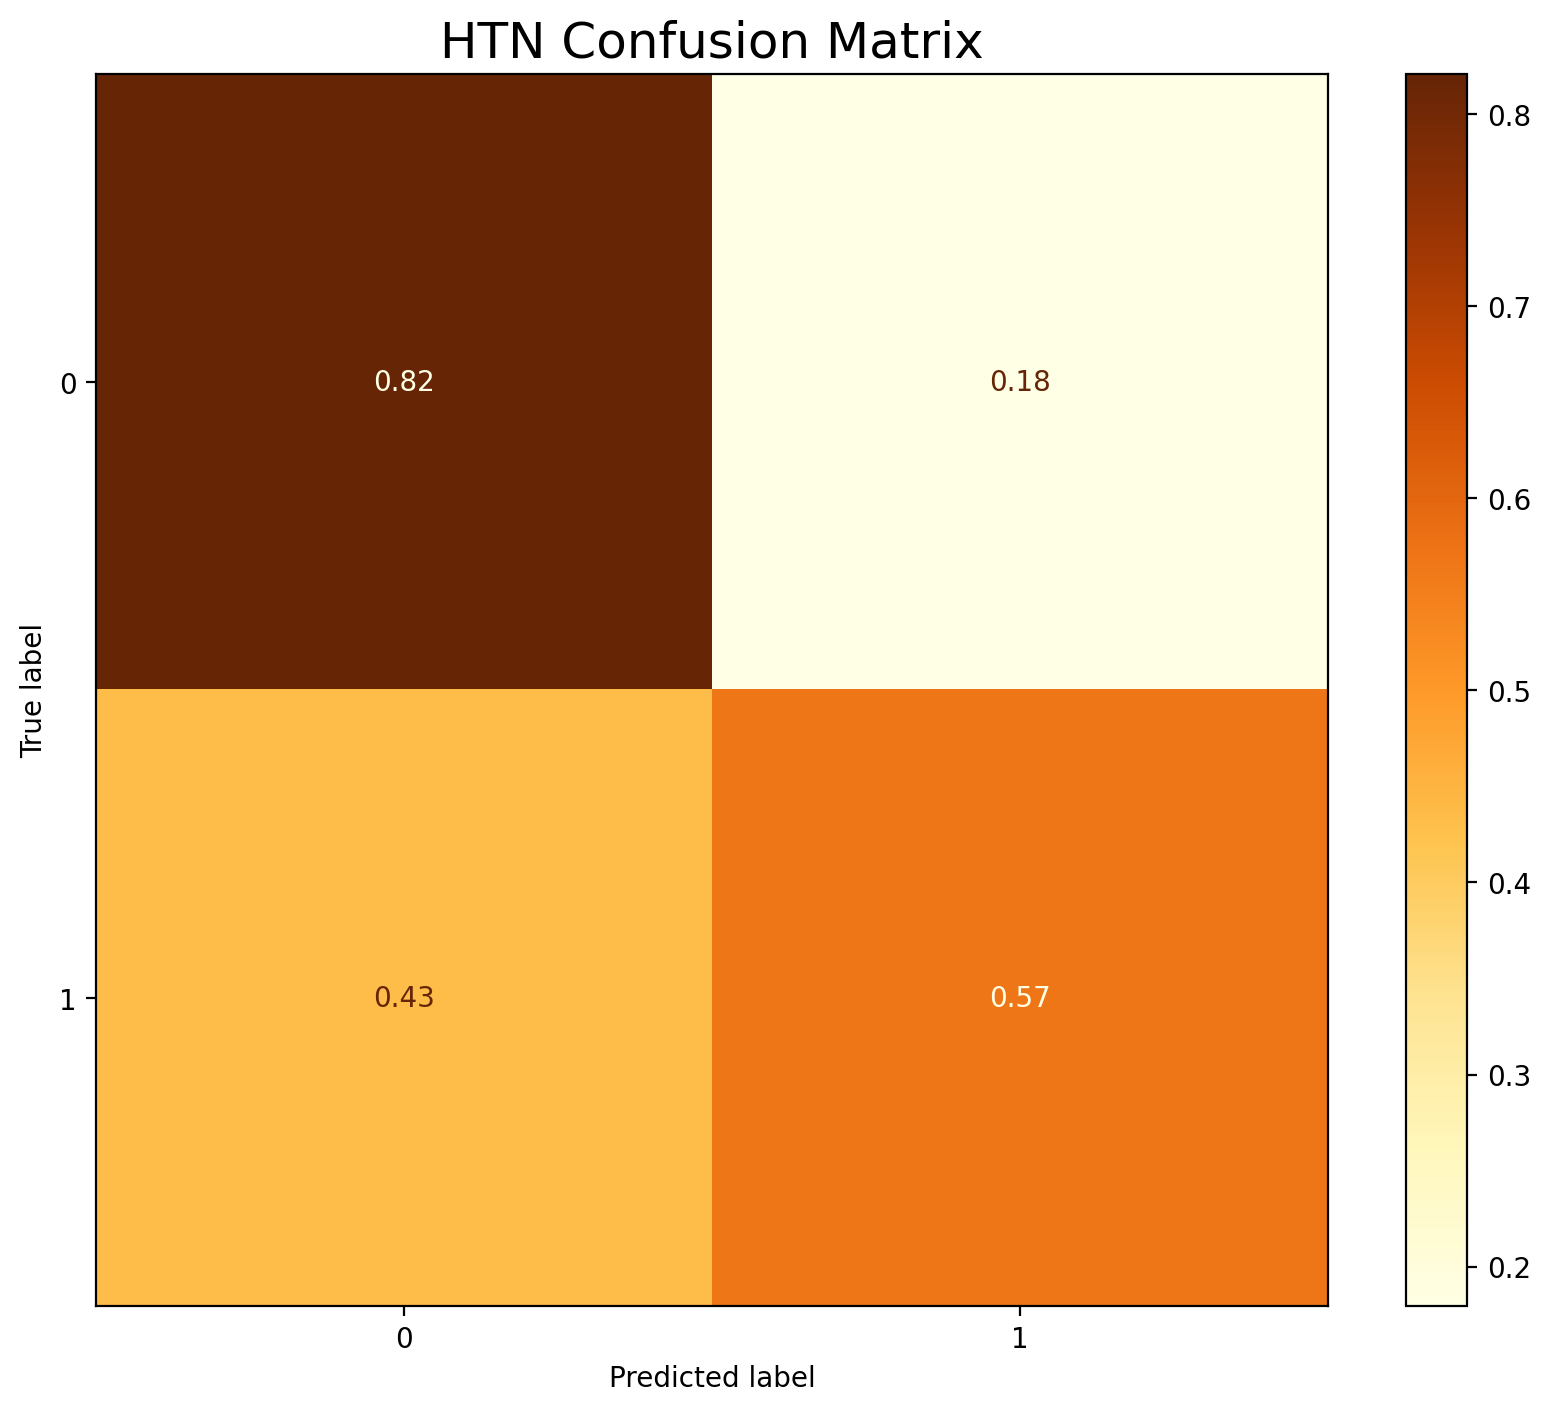

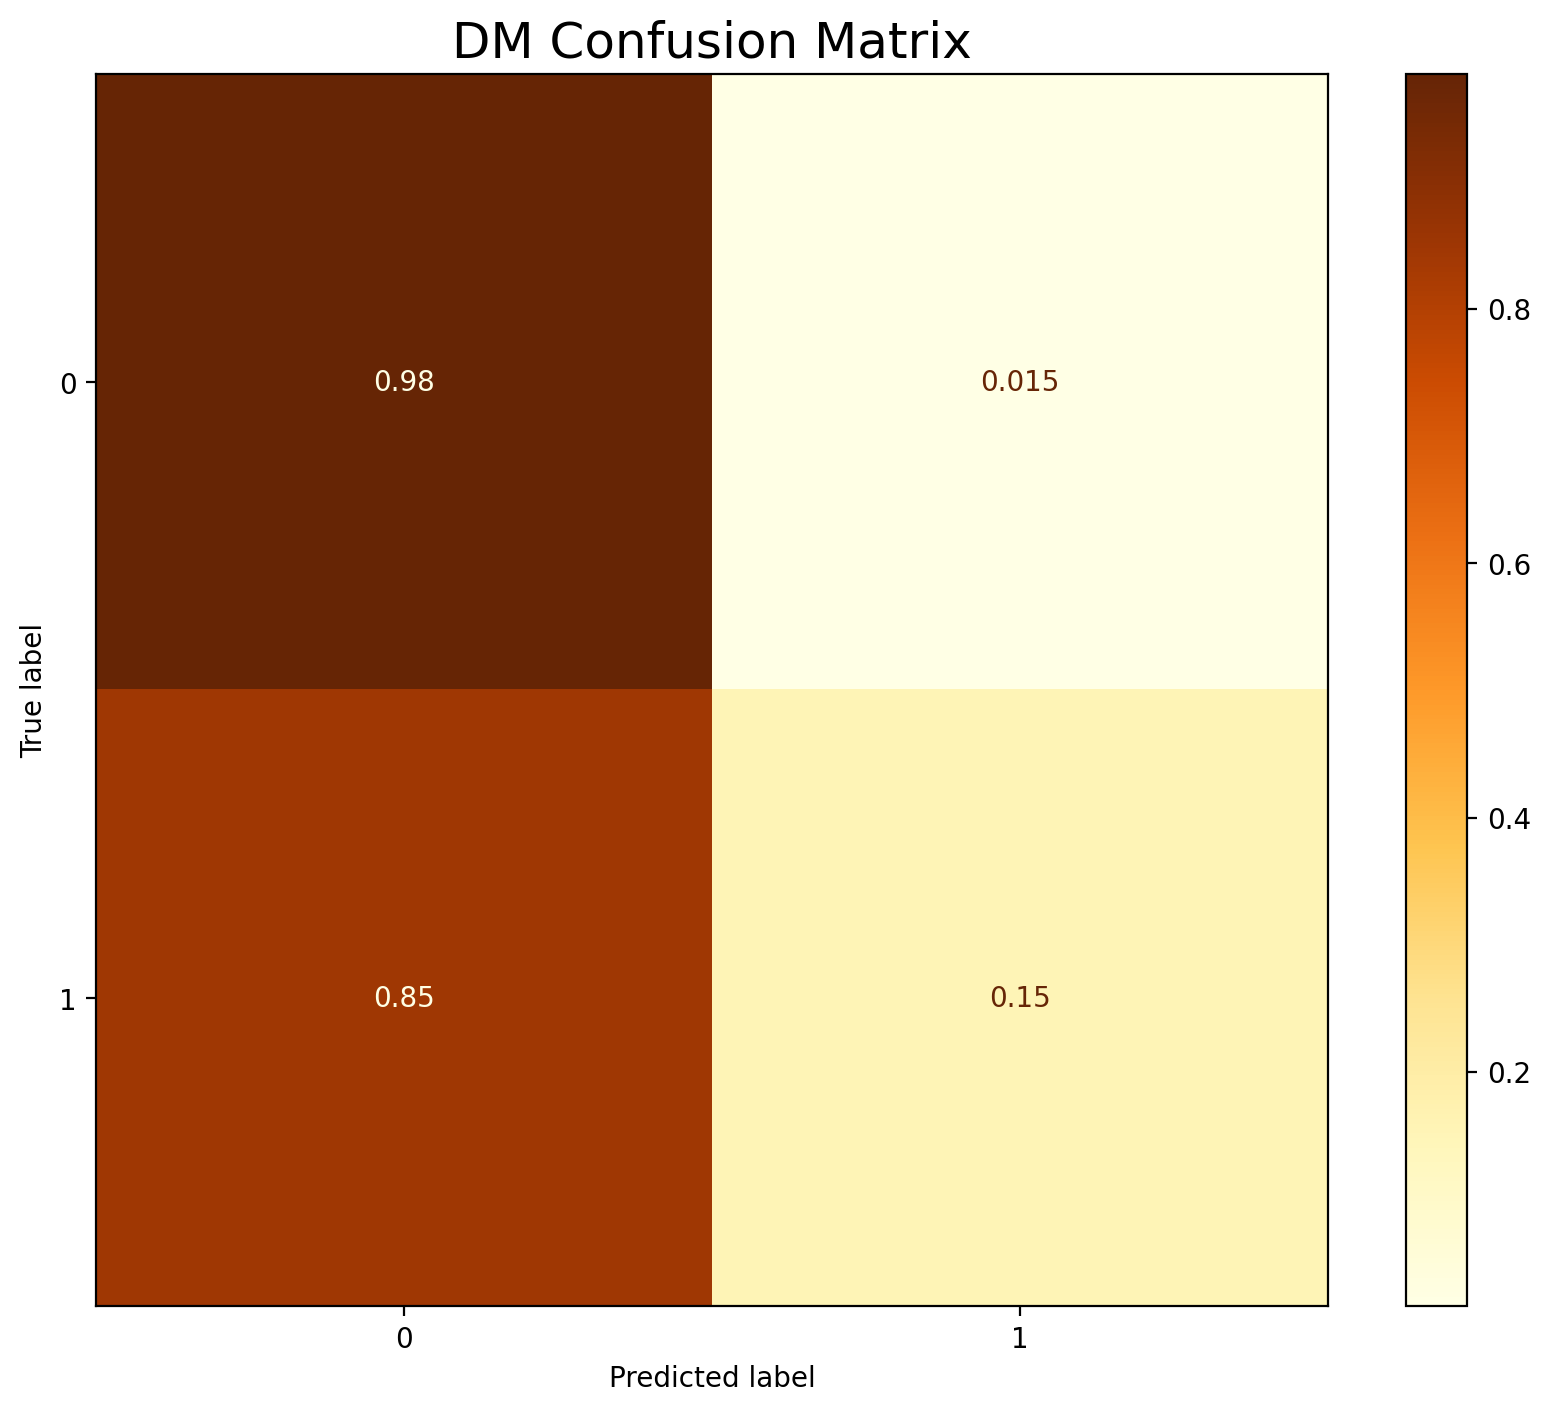

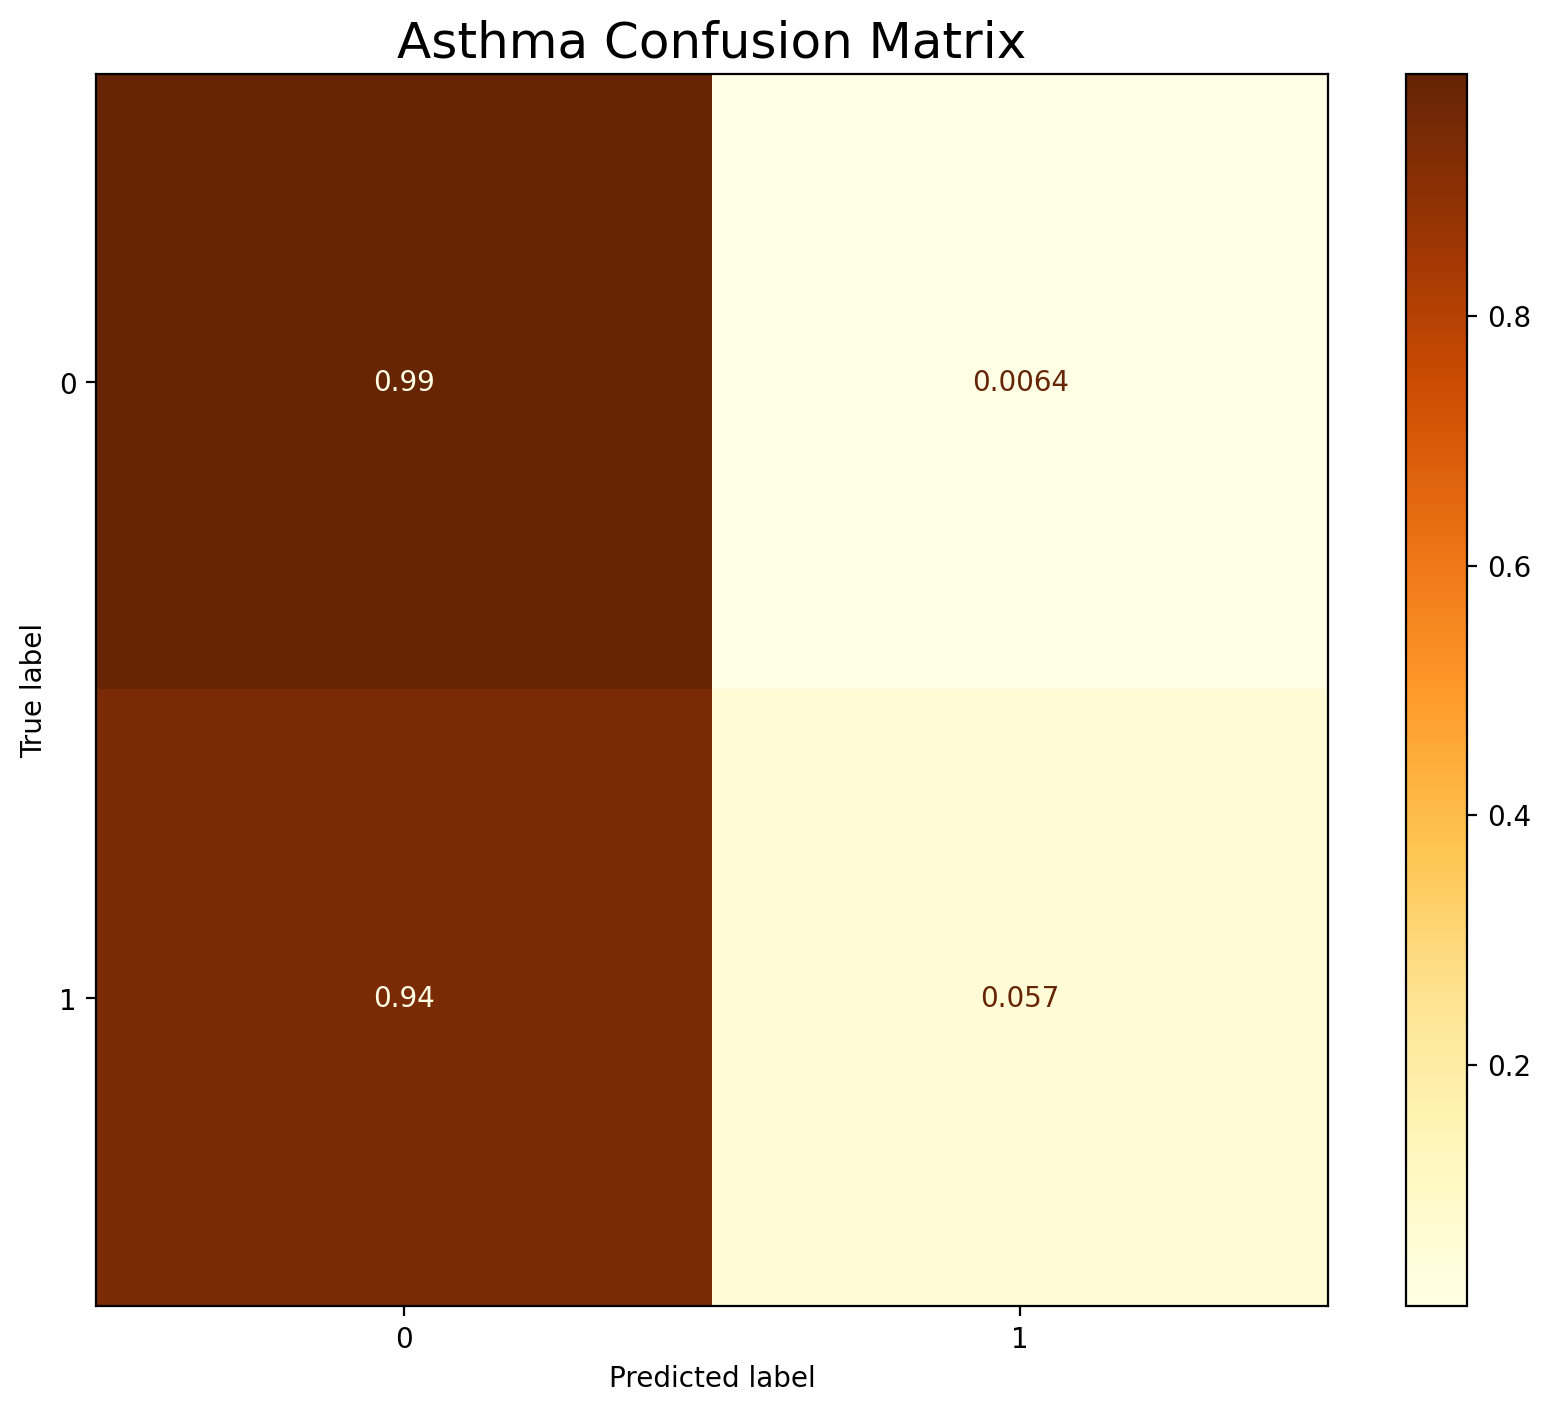

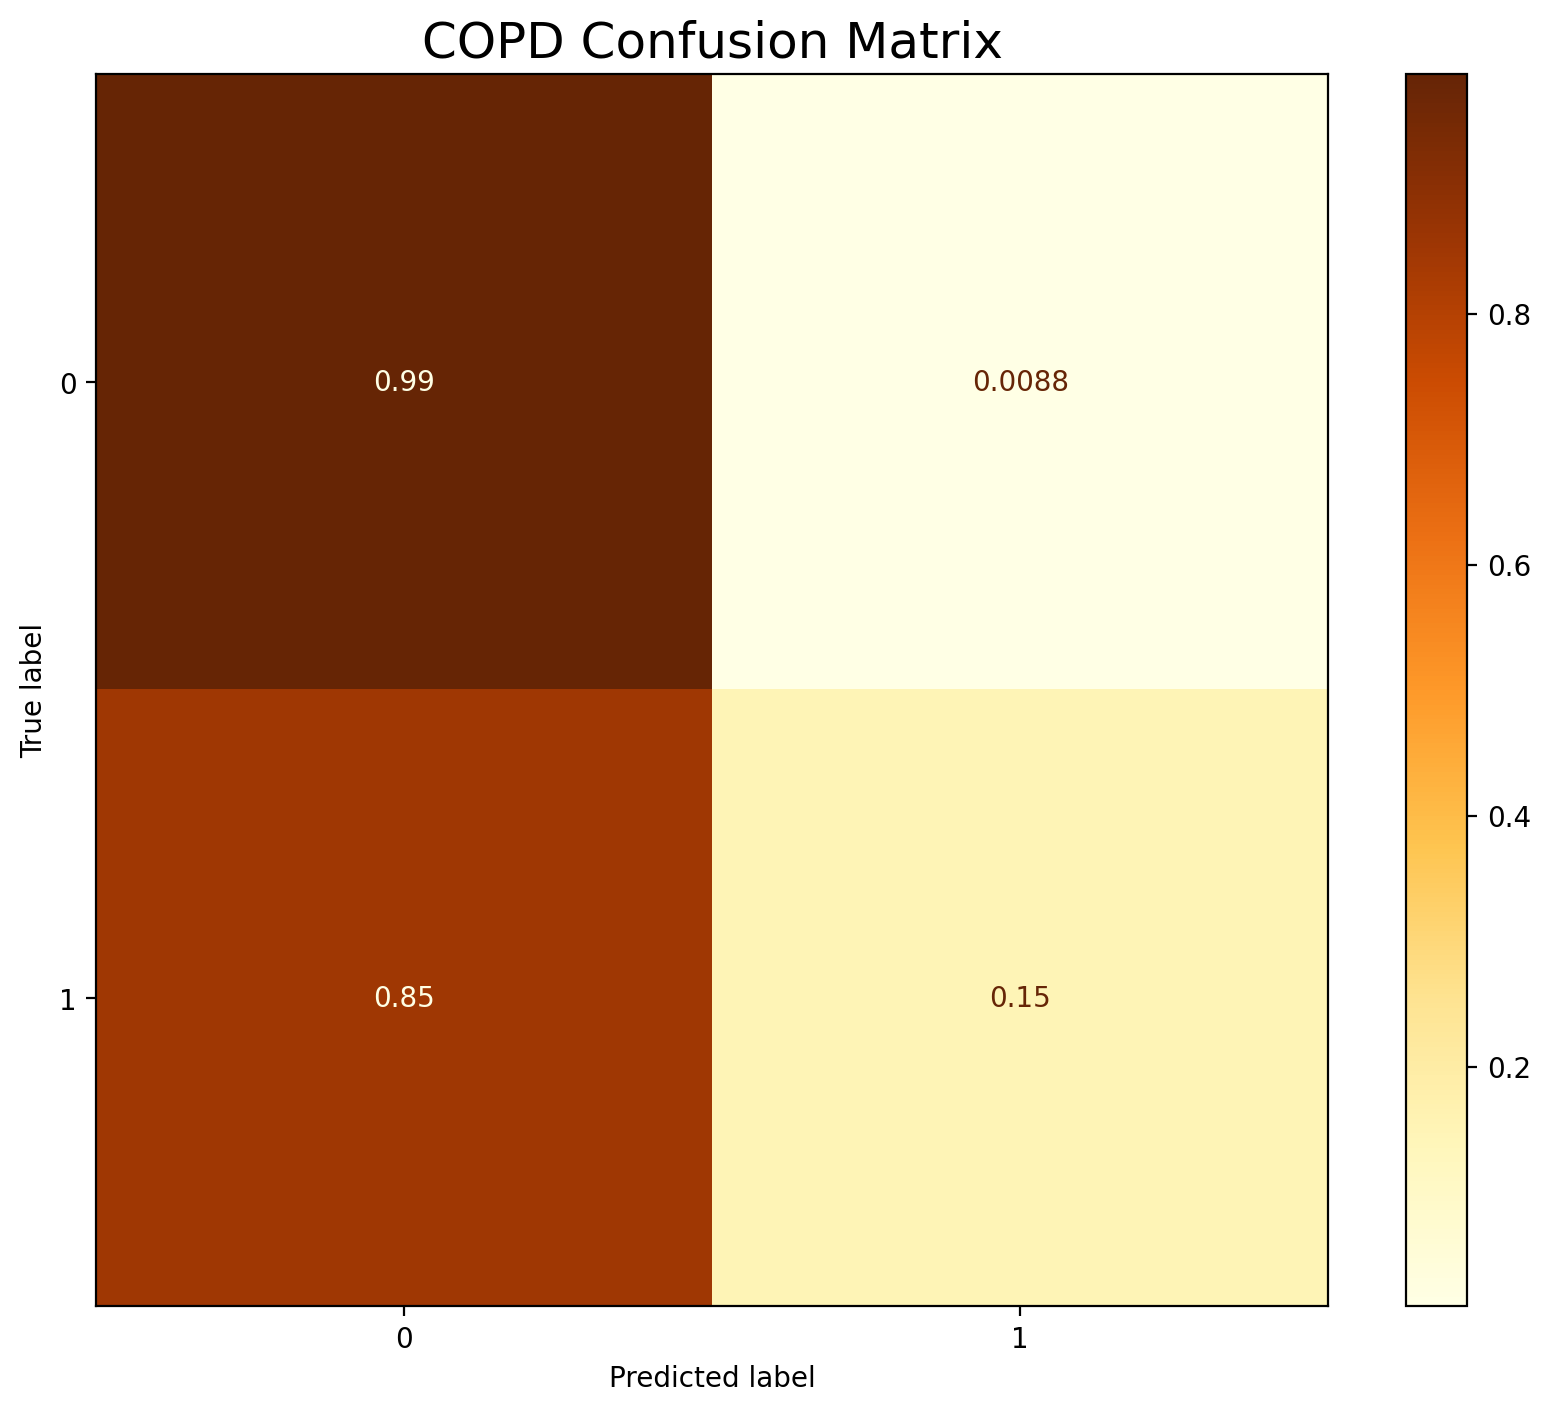

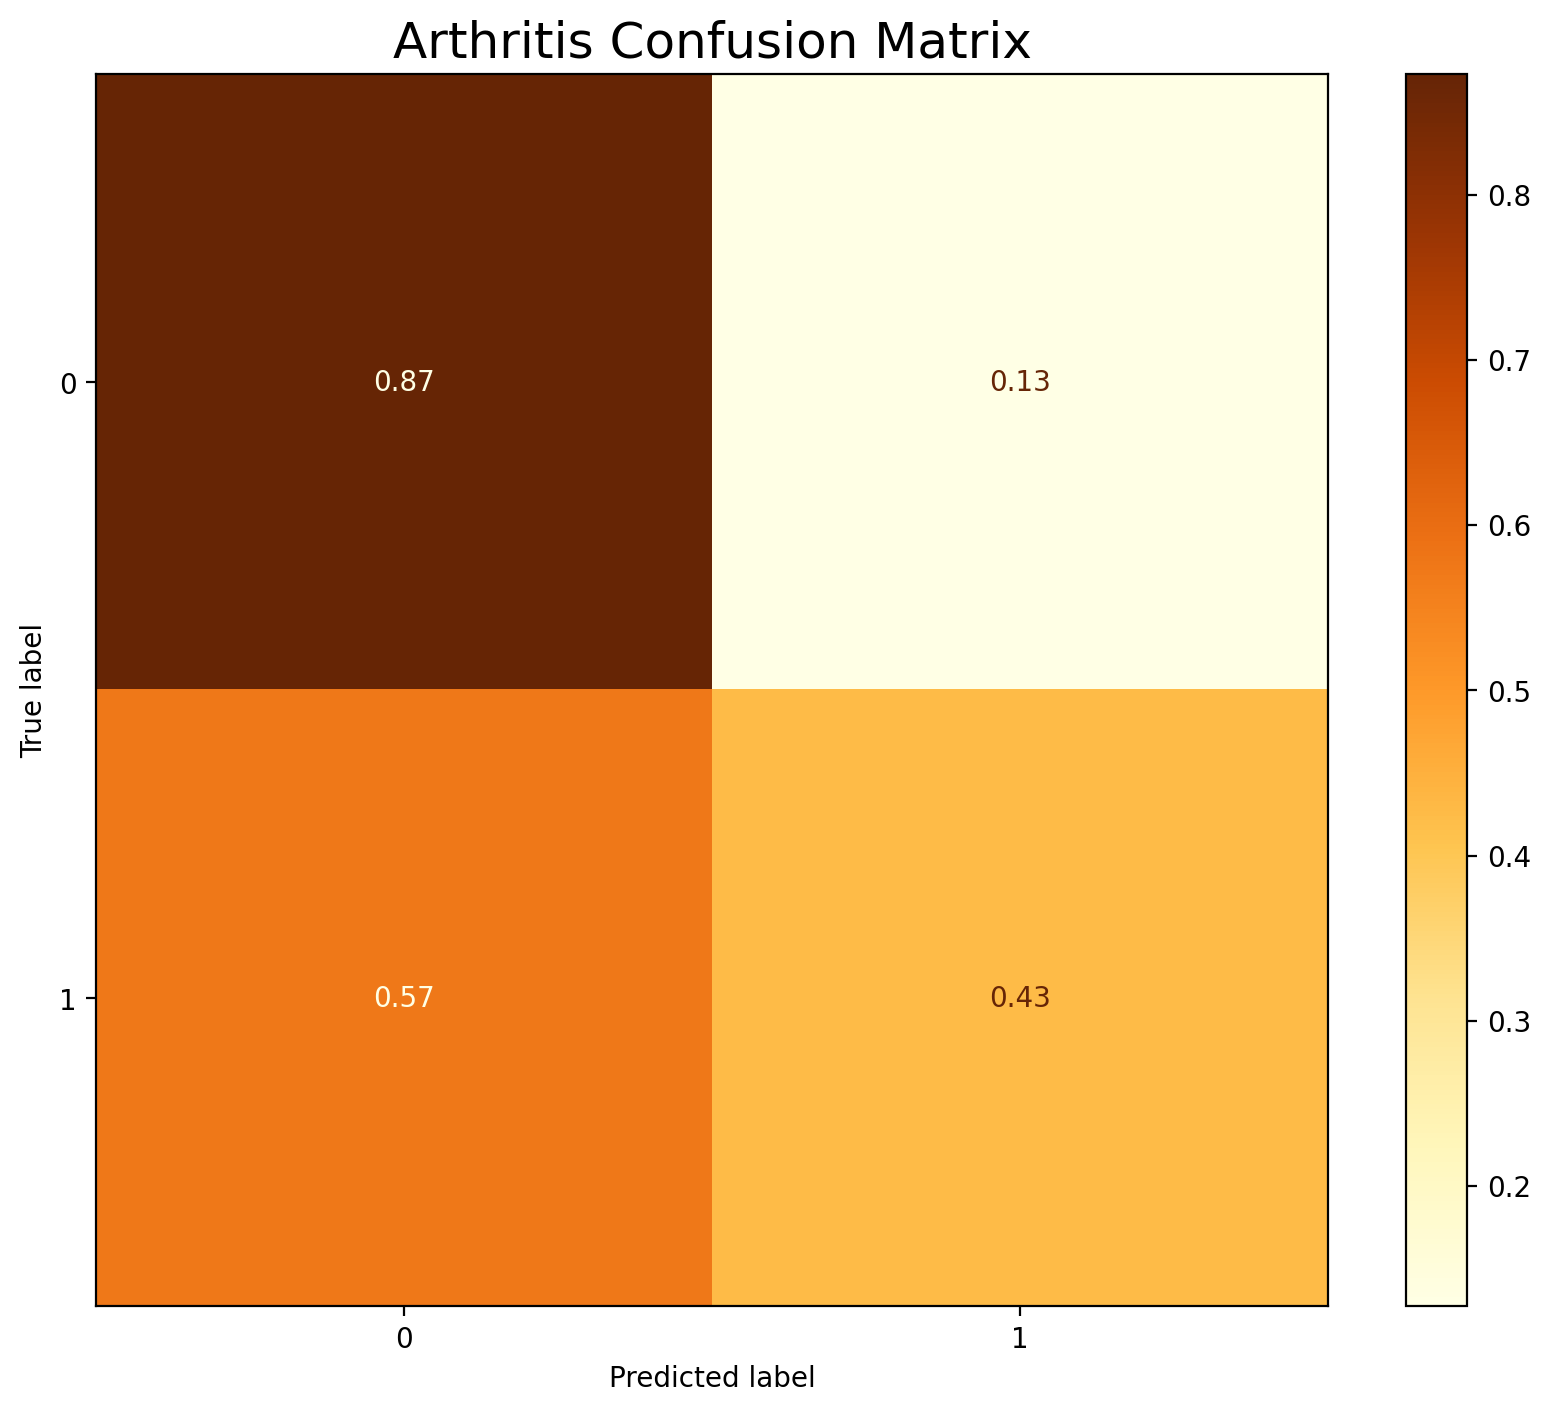

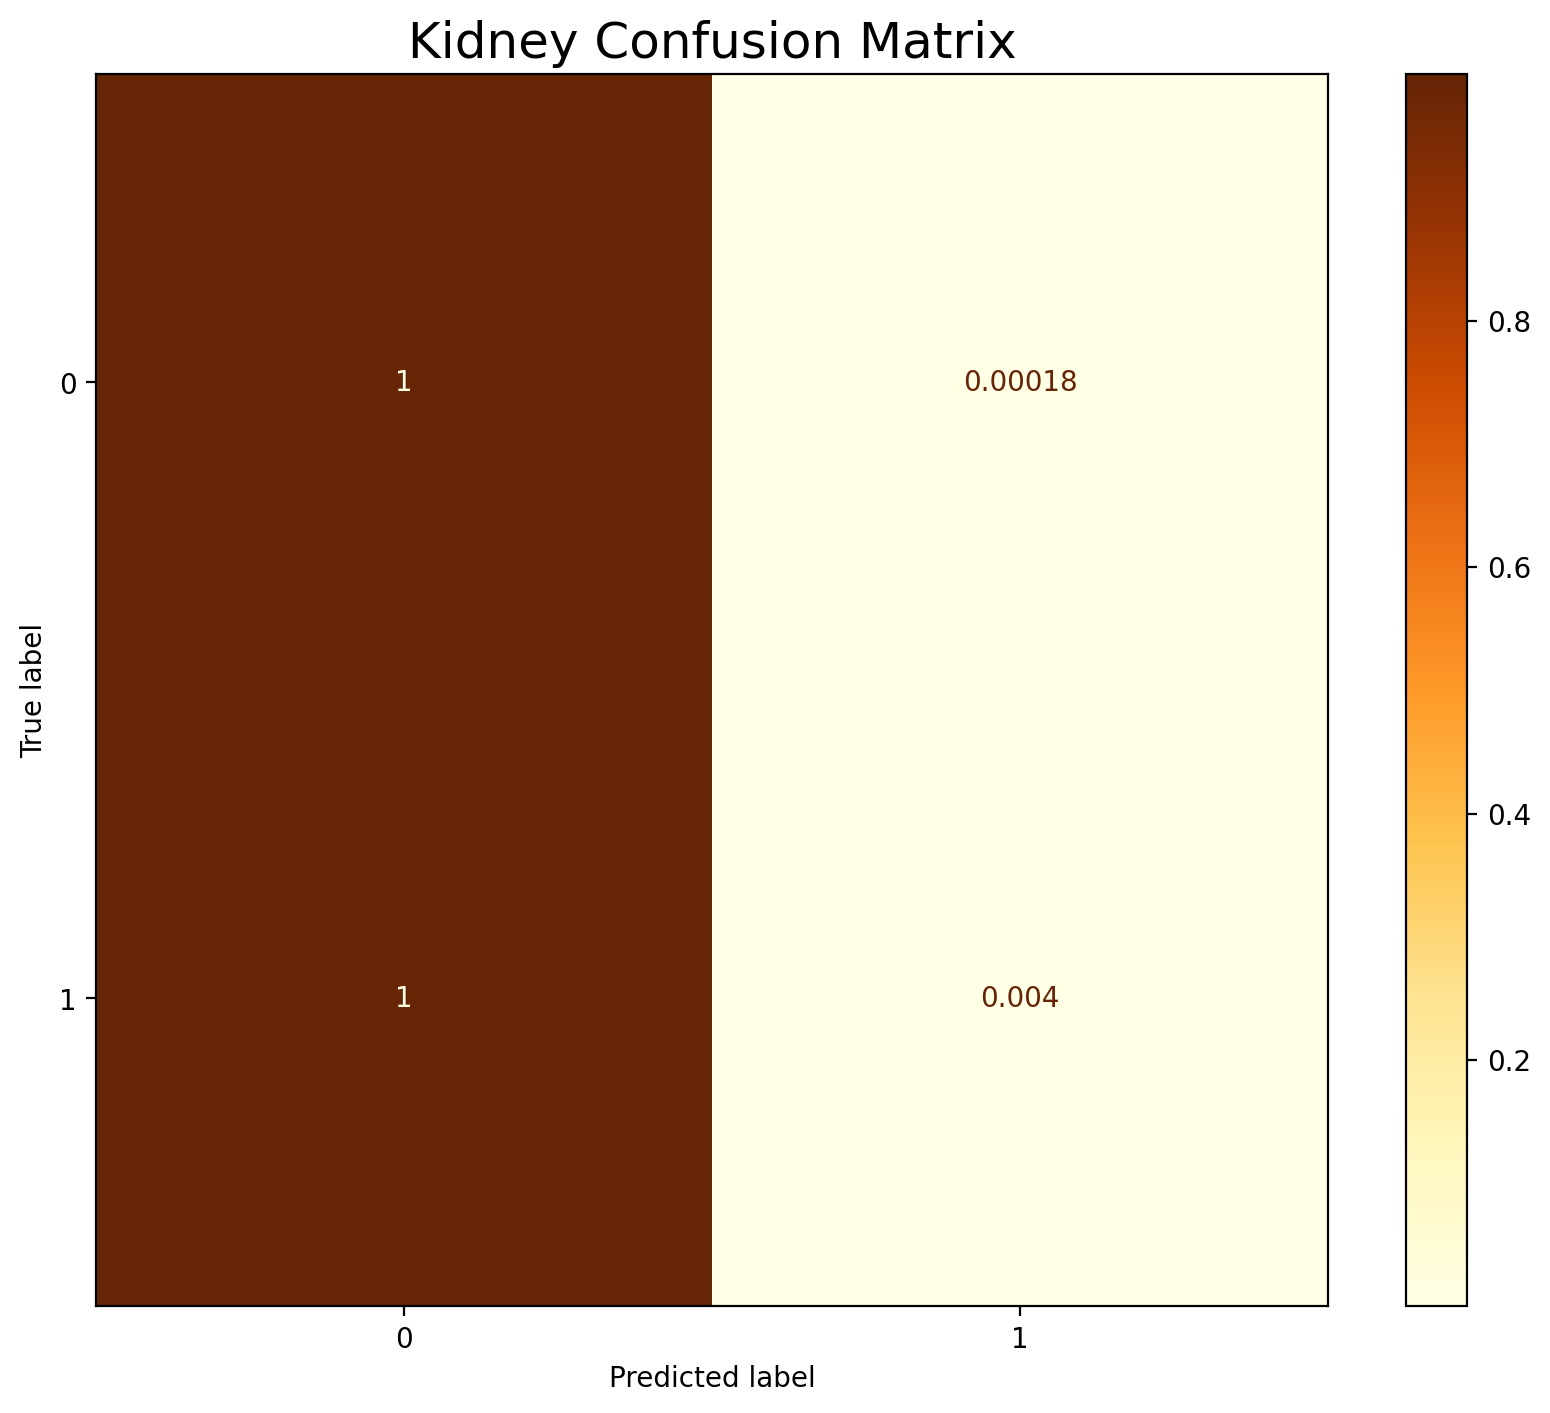

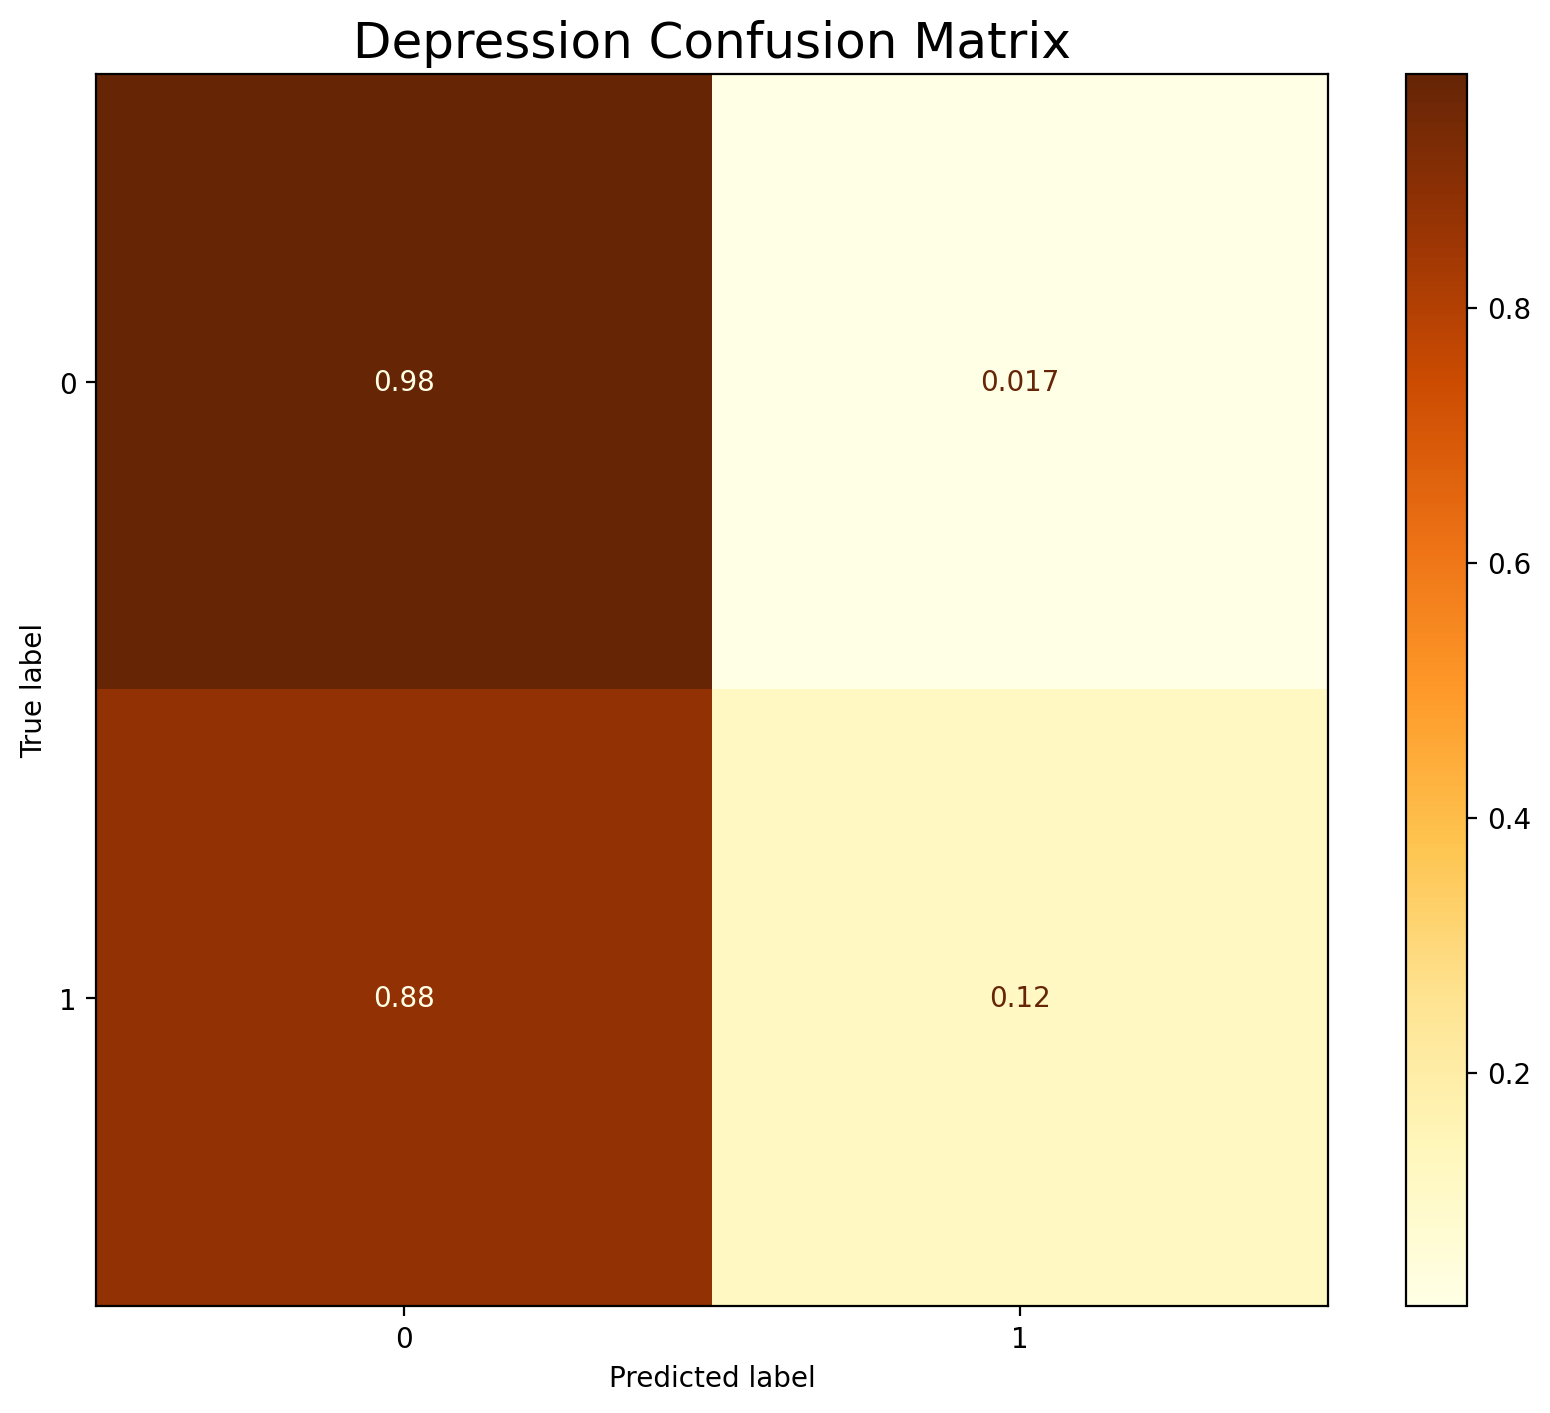

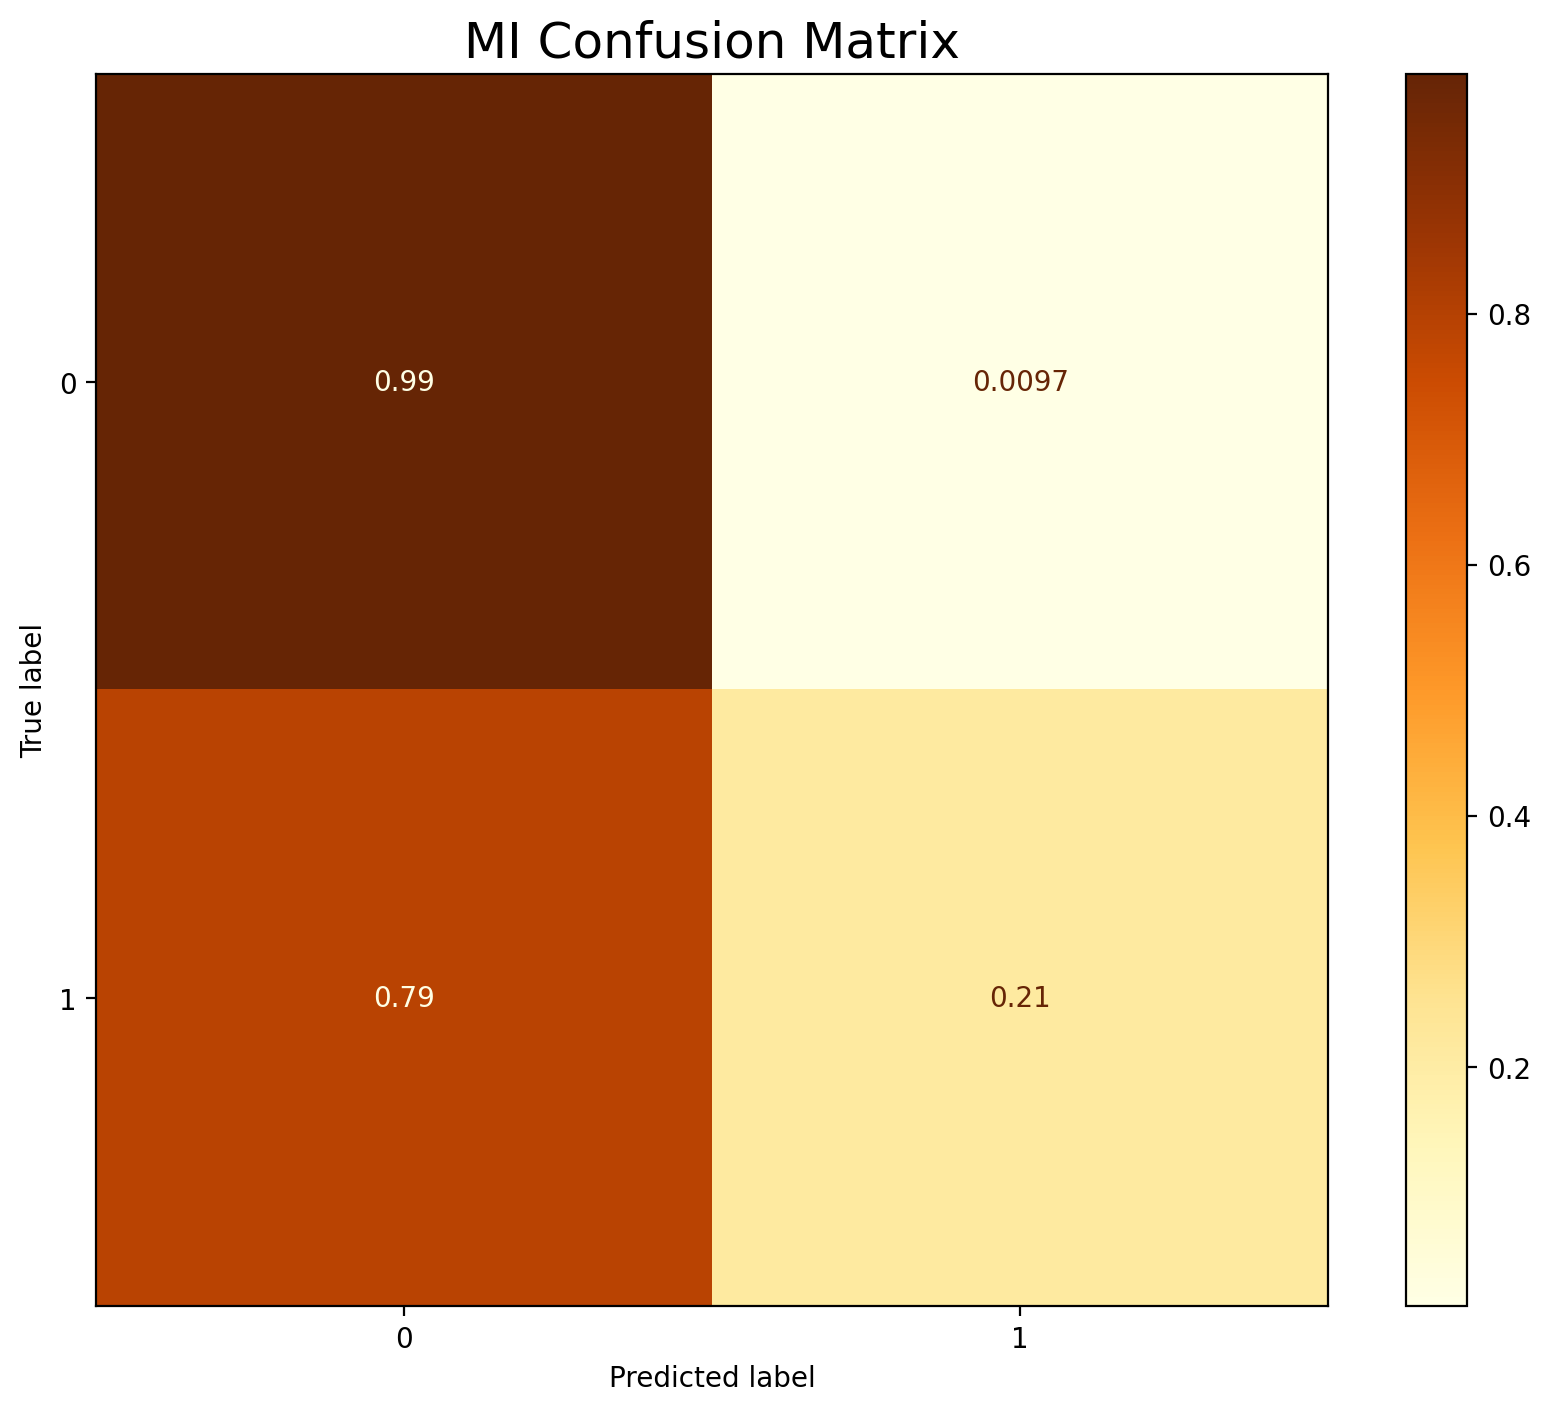

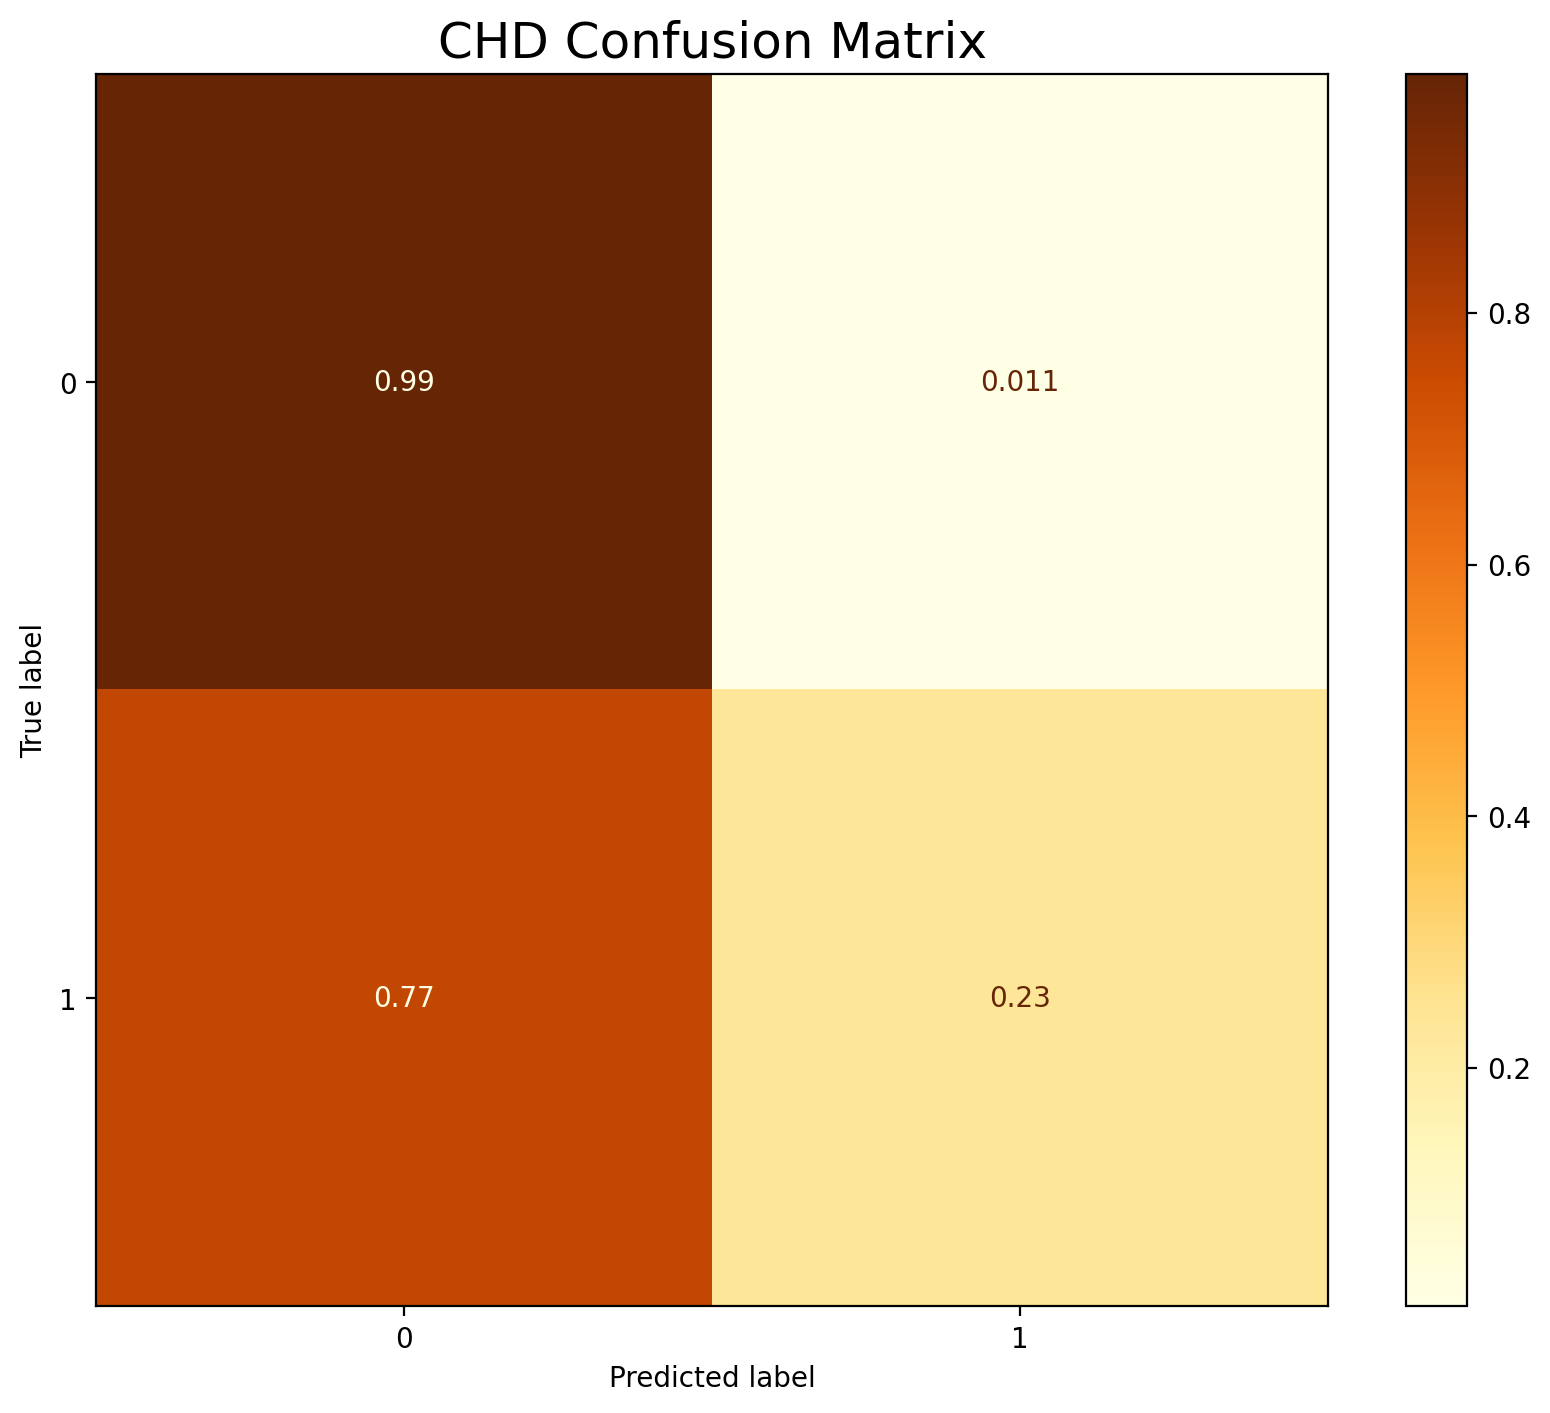

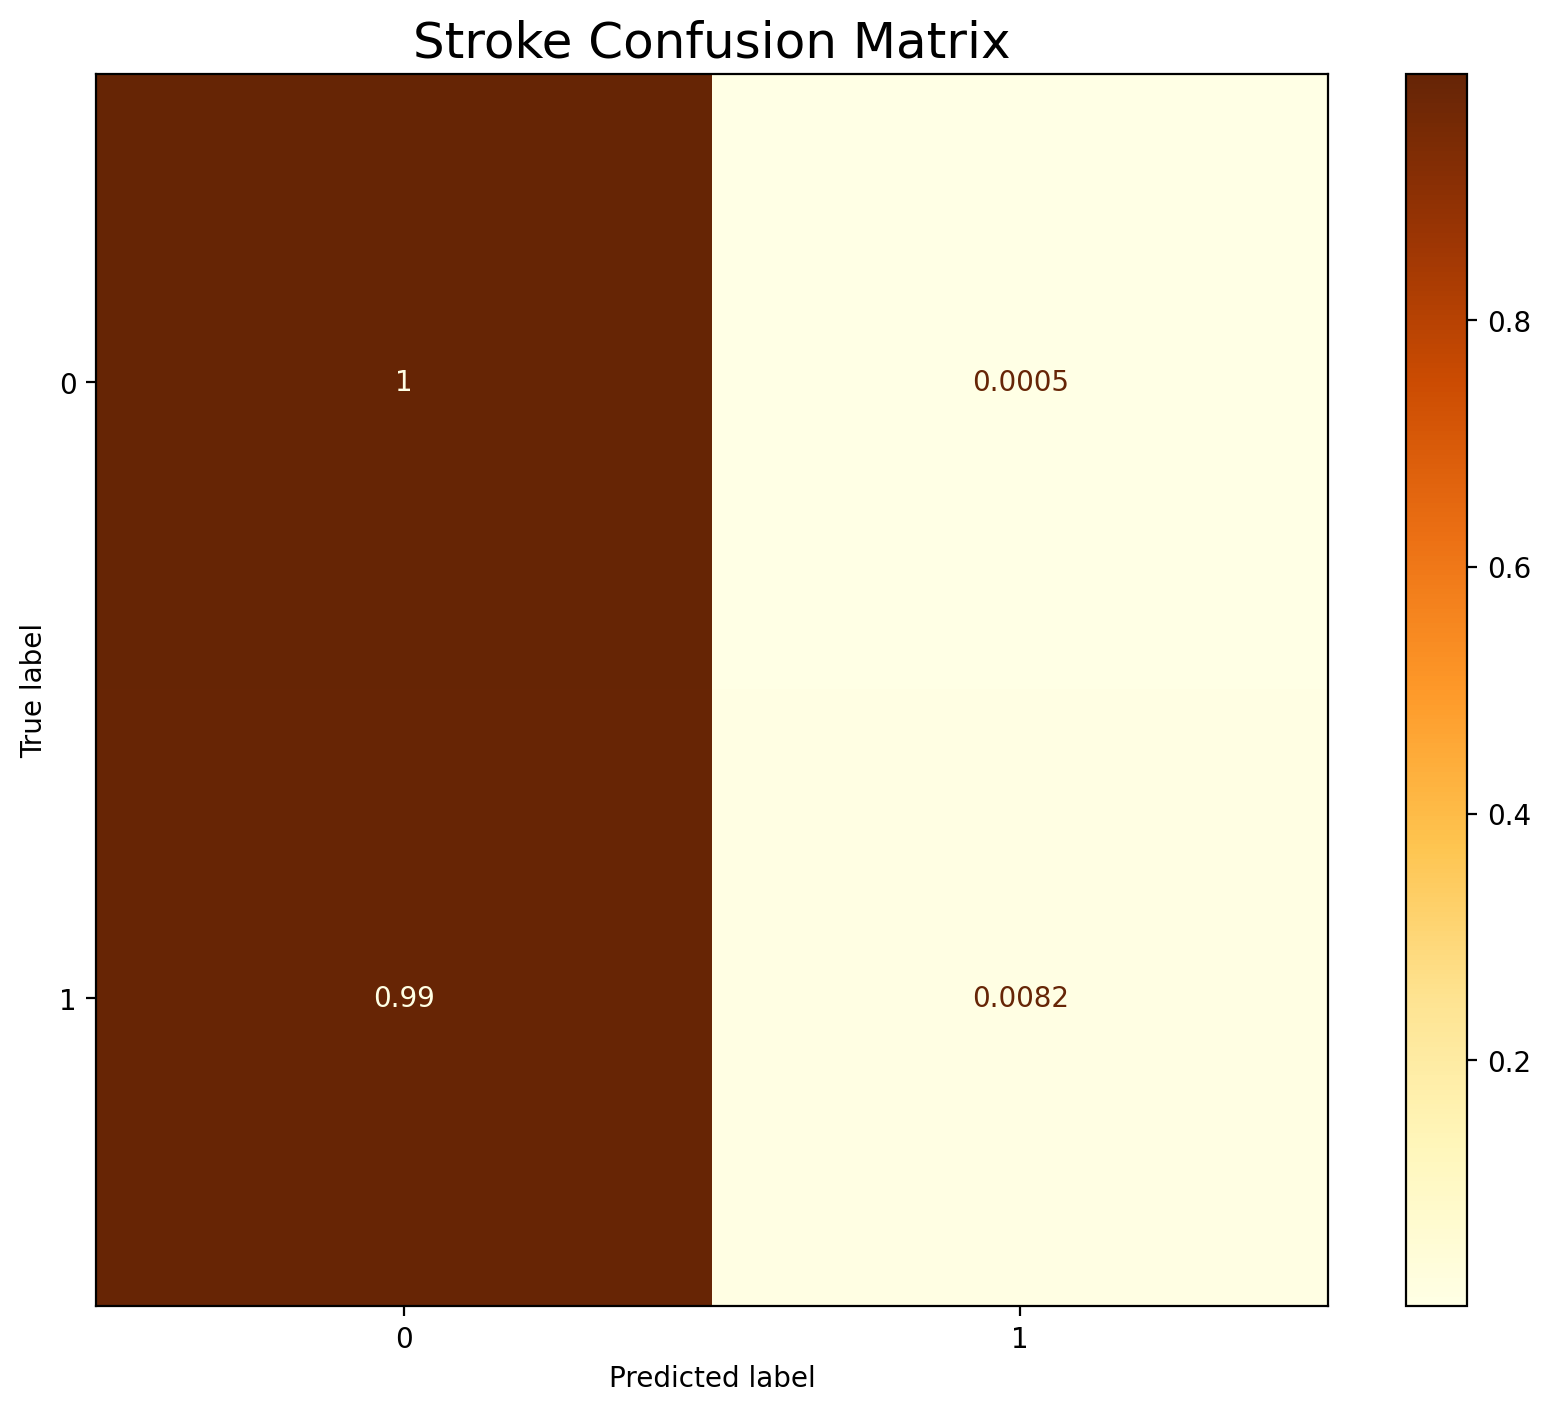

,Disease,Train Score,Test Score,Recall,Precision,Accuracy
0,HTN,0.72,0.72,56.56,68.15,71.77
1,DM,0.87,0.87,15.47,61.86,86.98
2,Asthma,0.86,0.86,5.66,60.24,85.57
3,COPD,0.92,0.92,14.72,59.33,92.33
4,Arthritis,0.72,0.72,42.55,62.83,72.25
5,Kidney,0.96,0.96,0.40,50.00,95.79
6,Depression,0.81,0.81,11.94,64.17,80.76
7,MI,0.95,0.95,21.22,54.77,94.94
8,CHD,0.95,0.95,23.31,55.54,94.83
9,Stroke,0.96,0.96,0.82,41.18,95.91


In [14]:
np.random.seed(1212)

report = pd.DataFrame(columns=['Disease', 'Train Score','Test Score','Recall','Precision','Accuracy'])

for disease in diseases:
    df_mod = df.dropna(subset=[col]).copy()
    
    for col in df_mod.columns:
        if col in num_vars:
            df_mod[col] = df_mod[col].fillna(df_mod[col].mean())
        else:
            if df_mod[col].dropna().isin(['Yes', 'No']).all() == True:
                df_mod[col] = df_mod[col].str.get_dummies()['Yes']
            else:
                df_mod[df_mod[col].dropna().unique().tolist()] = pd.get_dummies(df_mod[col])
                df_mod.drop([col], axis = 1, inplace=True)
    
    y = df_mod[disease]
    x = df_mod.drop(disease, axis=1)
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1212)

    fit = LogisticRegression().fit(x_train, y_train)
    y_preds = fit.predict(x_test)

    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_title(f"{disease} Confusion Matrix")
    metrics.plot_confusion_matrix(fit, x_test, y_test, cmap='YlOrBr', normalize='true', ax=ax)
    plt.show()
    
    train_score = round(fit.score(x_train, y_train), 2)
    test_score = round(fit.score(x_test, y_test), 2) 
    recall = round(metrics.recall_score(y_test, y_preds)*100, 2)
    precision = round(metrics.precision_score(y_test, y_preds)*100, 2)
    accuracy = round(metrics.accuracy_score(y_test, y_preds)*100, 2)

    report.loc[len(report.index)] = [str(disease), train_score, test_score, recall, precision, accuracy]

report